In [2]:
import csv
import numpy as np
with open('CPU.csv', 'r') as f:
    data = np.array(list(csv.reader(f)))

In [3]:
data.shape

(936578, 6)

In [4]:
title = data[0]
data = data[1:]
print(title)

['machine_id' 'date' 'ts' 'cpu_ghz' 'cpu_usage' 'idle']


In [5]:
cpu = dict()
for i in range(len(data)):
    if data[i][0] in cpu:
        cpu[data[i][0]]['date'].append(data[i][1])
        cpu[data[i][0]]['ts'].append(data[i][2])
        cpu[data[i][0]]['cpu_ghz'].append(float(data[i][3]))
        cpu[data[i][0]]['cpu_usage'].append(float(data[i][4]))
        cpu[data[i][0]]['idle'].append(float(data[i][5]))
    else:
        cpu[data[i][0]] = dict()
        cpu[data[i][0]]['date'] = [data[i][1]]
        cpu[data[i][0]]['ts'] = [data[i][2]]
        cpu[data[i][0]]['cpu_ghz'] = [float(data[i][3])]
        cpu[data[i][0]]['cpu_usage'] = [float(data[i][4])]
        cpu[data[i][0]]['idle'] = [float(data[i][5])]

In [6]:
cpu.keys()

dict_keys(['a-957043145-UserCluster1-sysadmin', 'i-325376172-UserCluster1-sysadmin', 'z-323389049-UserCluster1-sysadmin', 'b-956223090-UserCluster1-sysadmin', 'c-959255288-UserCluster1-sysadmin', 't-657740490-UserCluster1-sysadmin'])

In [7]:
for m_id, attr in cpu.items():
    for key, val in attr.items():
        cpu[m_id][key] = np.array(val)

In [8]:
for m_id, attr in cpu.items():
    arg_sort_by_ts = np.argsort(cpu[m_id]['ts'])
    for key, val in attr.items():
        cpu[m_id][key] = val[arg_sort_by_ts]

In [9]:
cpu['i-325376172-UserCluster1-sysadmin']['date'][0:100]

array(['2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4',
       '2017/8/4', '2017/8/4', '2017/8/4', '2017/8/4', '2017/8

In [10]:
test = cpu['i-325376172-UserCluster1-sysadmin']
ind_last = 0
for i in range(len(test['date'])):
    if test['date'][i] == '2017/8/4':
        ind_last = i
ind_last

28348

In [11]:
for key, val in test.items():
    test[key] = val[0:28000]

In [12]:
test

{'cpu_ghz': array([ 1.224,  1.2  ,  1.2  , ...,  1.249,  1.384,  1.701]),
 'cpu_usage': array([ 0.011516,  0.007435,  0.006037, ...,  0.042145,  0.0346  ,
         0.045485]),
 'date': array(['2017/8/4', '2017/8/4', '2017/8/4', ..., '2017/8/4', '2017/8/4',
        '2017/8/4'], 
       dtype='<U8'),
 'idle': array([  9957.,  10013.,  10044., ...,   9841.,   9933.,   9842.]),
 'ts': array(['2017-08-04 07:03:49+0000', '2017-08-04 07:03:51+0000',
        '2017-08-04 07:03:53+0000', ..., '2017-08-04 23:47:22+0000',
        '2017-08-04 23:47:24+0000', '2017-08-04 23:47:26+0000'], 
       dtype='<U24')}

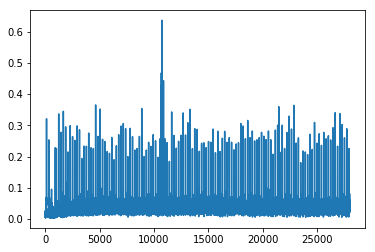

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(test['cpu_usage'])), test['cpu_usage'])
plt.show()

In [16]:
usage = test['cpu_usage']
ghz = test['cpu_ghz']
idle = test['idle']

In [17]:
usage_ = list()
ghz_ = list()
idle_ = list()
for i in range(1400):
    usage_.append([np.mean(test['cpu_usage'][i*20:i*20+20]), np.std(test['cpu_usage'][i*20:i*20+20])])
    ghz_.append([np.mean(test['cpu_ghz'][i*20:i*20+20]), np.std(test['cpu_ghz'][i*20:i*20+20])])
    idle_.append([np.mean(test['idle'][i*20:i*20+20]), np.std(test['idle'][i*20:i*20+20])])
usage_ = np.array(usage_)
ghz_ = np.array(ghz_)
idle_ = np.array(idle_)

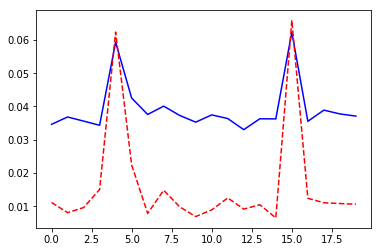

In [57]:
import matplotlib.pyplot as plt
plt.plot(np.arange(20), usage_[640:660, 0], 'b')
plt.plot(np.arange(20), usage_[640:660, 1], '--r')
plt.show()

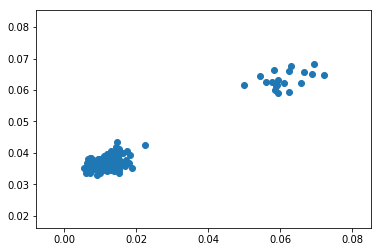

In [26]:
plt.scatter(usage_[600:800, 1], usage_[600:800, 0])
plt.show()
# treshold : std=0.03

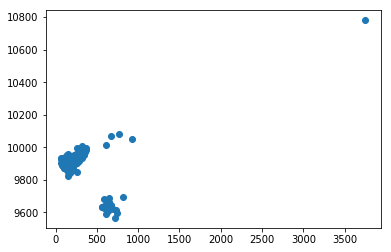

In [119]:
plt.scatter(idle_[600:800, 1], idle_[600:800, 0])
plt.show()

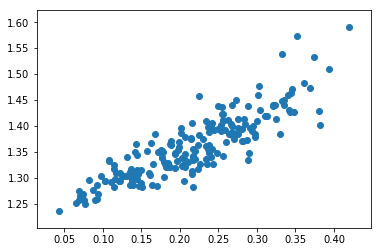

In [120]:
plt.scatter(ghz_[600:800, 1], ghz_[600:800, 0])
plt.show()

In [43]:
cpu_test = np.hstack([usage_, ghz_, idle_])
usage_.shape, cpu_test.shape

((1400, 2), (1400, 6))

In [44]:
cpu_test = cpu_test[600:800]
cpu_test.shape

(200, 6)

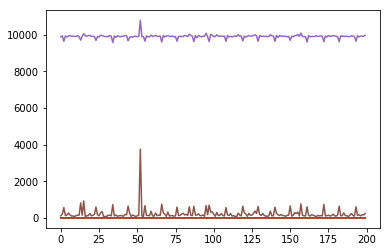

In [45]:
import matplotlib.pyplot as plt
plt.plot(np.arange(200), cpu_test)
plt.show()

In [47]:
# normalization
for i in range(len(cpu_test[0])):
    max_val = np.max(cpu_test[:, i])
    min_val = np.min(cpu_test[:, i])
    cpu_test[:, i] = (cpu_test[:, i]-min_val)/(max_val-min_val)

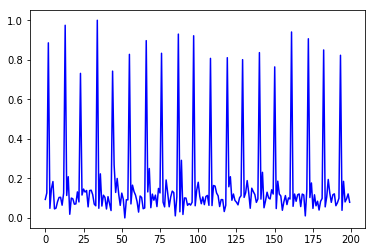

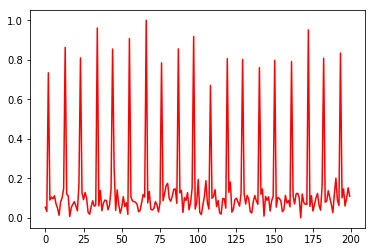

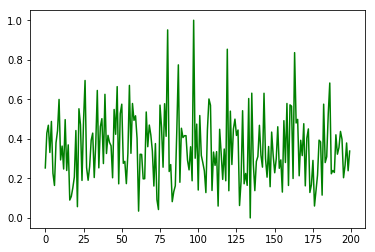

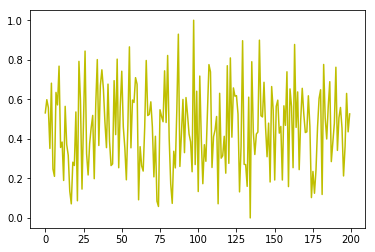

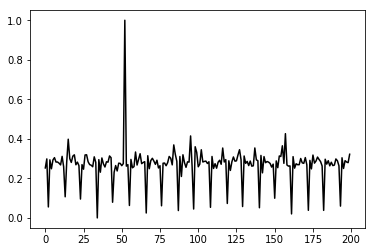

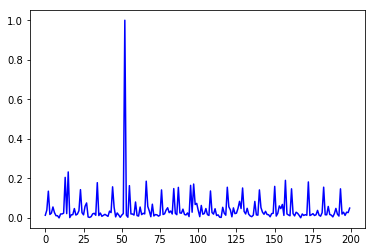

In [53]:
import matplotlib.pyplot as plt
color = ['b', 'r', 'g', 'y', 'k', 'b']
for i in range(len(cpu_test[0])):
    plt.plot(np.arange(200), cpu_test[:, i], color[i])
    plt.show()

In [54]:
# save to npy
np.save('cpu_test', cpu_test)

In [ ]:
!cp data_preparing.ipynb data_preparing_c.ipynb

[sudo] password for warrents: 